# Importing Libraries

In [1]:
import numpy as np
import cv2 
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

# Featching the data folder and creating two empty list for the X which is indipendent and y is the dependent variable

In [2]:
X = []
y = []

In [3]:
categories = {'Live':0,'Spoof':1}

In [4]:
categories

{'Live': 0, 'Spoof': 1}

# Reading the image files and converting it into an array

In [5]:
for category in categories:
    path = 'Dataset/Spoof_data/Spoof_data/Train/'+category
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j,0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        y.append(categories[category])

In [6]:
X = np.array(X)
y = np.array(y)
X_n = X.reshape(len(X),-1) # Converteded into 1-D array
X_n

array([[ 71,  69,  71, ..., 112, 118, 141],
       [ 76,  74,  78, ..., 121, 124, 153],
       [ 72,  70,  73, ..., 114, 118, 144],
       ...,
       [ 71,  70,  71, ..., 119, 121, 154],
       [ 68,  65,  66, ..., 114, 116, 147],
       [ 71,  69,  70, ..., 119, 121, 153]], dtype=uint8)

# Data Analysis

In [7]:
np.unique(y)

array([0, 1])

In [8]:
pd.Series(y).value_counts()

1    207
0    200
dtype: int64

In [9]:
X.shape

(407, 200, 200)

In [10]:
y.shape

(407,)

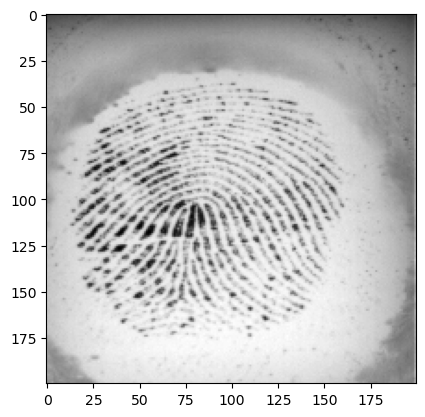

In [11]:
plt.imshow(X[3],cmap='gray')

# Dividing the data into train and test

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_n,y,random_state = 10,test_size = 0.25)

In [13]:
X_train.shape,X_test.shape

((305, 40000), (102, 40000))

# Feature Scaling

In [14]:
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())

215 0
213 0


In [15]:
X_train = X_train/215
X_test = X_test/213

In [16]:
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())

1.0 0.0
1.0 0.0


# Model Training

In [17]:
model = SVC(C=1,kernel='linear',gamma='auto')
model.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

# Prediction

In [18]:
prediction = model.predict(X_test)

In [19]:
prediction

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [20]:
Misclassification = np.where(y_test!=prediction)
Misclassification

(array([ 0,  1,  2,  9, 14, 15, 29, 36, 37, 43, 50, 52, 55, 57, 58, 64, 82,
        92], dtype=int64),)

# Evaluation

In [21]:
acc = accuracy_score(prediction,y_test)
print('Accuracy Score: ',acc)

Accuracy Score:  0.8235294117647058


In [22]:
classif = classification_report(prediction,y_test)
print('Classification Report:',classif)

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.81      0.83        53
           1       0.80      0.84      0.82        49

    accuracy                           0.82       102
   macro avg       0.82      0.82      0.82       102
weighted avg       0.82      0.82      0.82       102



# Testing (On test dataset)

In [23]:
Cat = {0:'Live',1:'Spoof'}

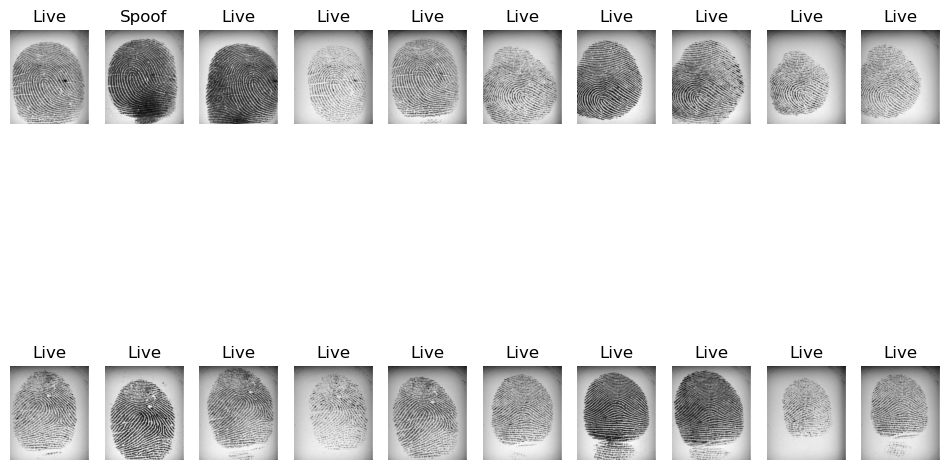

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('Dataset/Spoof_data/Spoof_data/Test/')
c=1
for i in os.listdir('Dataset/Spoof_data/Spoof_data/Test/Live/')[:20]:
    plt.subplot(2,10,c)
    img = cv2.imread('Dataset/Spoof_data/Spoof_data/Test/Live/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(Cat[p[0]])
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c+=1

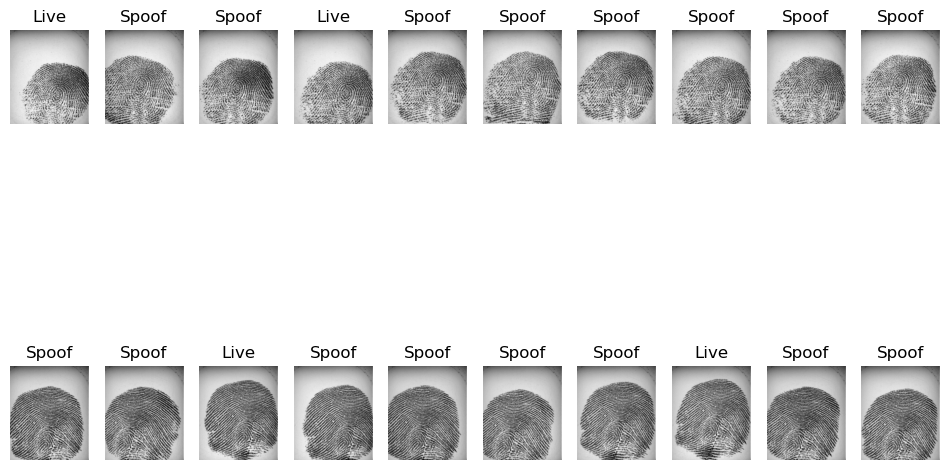

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir('Dataset/Spoof_data/Spoof_data/Test/')
c=1
for i in os.listdir('Dataset/Spoof_data/Spoof_data/Test/Spoof/')[:20]:
    plt.subplot(2,10,c)
    img = cv2.imread('Dataset/Spoof_data/Spoof_data/Test/Spoof/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(Cat[p[0]])
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c+=1